<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/%EB%AA%A8%EB%91%90%EB%A5%BC%20%EC%9C%84%ED%95%9C%20%EB%94%A5%EB%9F%AC%EB%8B%9D/lab11_1_TensorFlow_CNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


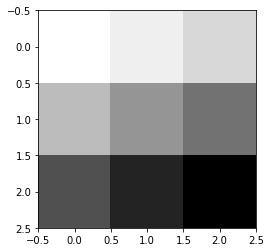

In [32]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

(1,3,3,1) 앞의 1은 N개의 이미지를 뜻함.

# Simple convolution layer
- Image: 1,3,3,1 image
- Filter: 2,2,1(color),1(fiter)
- Stride: 1*1

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


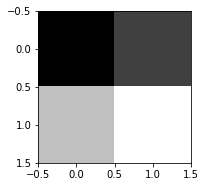

In [30]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape',conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1,2,i+1),plt.imshow(one_img.reshape(2,2),cmap='gray')

## 3 filters

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


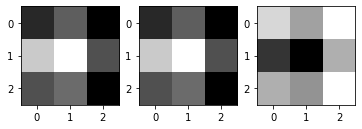

In [37]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape',conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,3,i+1),plt.imshow(one_img.reshape(3,3),cmap='gray')

## Max Pooling

In [48]:
image  = np.array([[[[4],[3]],
                     [[2],[1]]]],dtype= np.float32)
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],
                      strides=[1,1,1,1],padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


#MNIST

## MNIST image loading

In [46]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

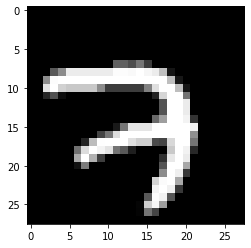

In [47]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')

## MNIST Convolution layer

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_19:0", shape=(1, 14, 14, 5), dtype=float32)


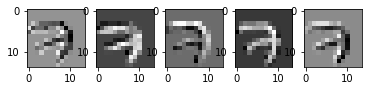

In [53]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01)) # 3*3 , 1의 색깔, 5개의 사진
conv2d = tf.nn.conv2d(img,W1,strides=[1,2,2,1],padding='SAME') # 2,2 -> 두칸씩 움직이겠다.
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
  plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


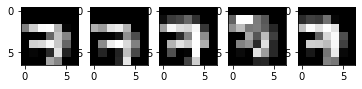

In [54]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

#